# 分類器の精度指標

In [1]:
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

In [2]:
# データロード
df = sns.load_dataset('iris')

y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

In [3]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# 予測
y_pred = model.predict(X_test)

## 混合行列

In [6]:
# 「行：正解、列：予測」を意味
cm = confusion_matrix(y_test, y_pred)

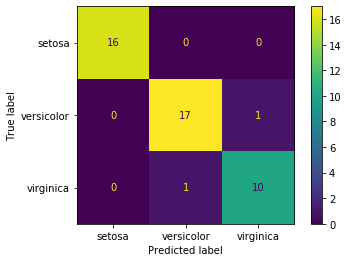

In [7]:
# 混合行列表示
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy（正解率）

In [8]:
y_true = np.array([1,1,0,1,0,0,1,1])
y_pred = np.array([1,1,1,0,0,1,0,1])
accuracy_score(y_true, y_pred)

0.5

## Precision（適合率）

In [9]:
y_true = np.array([1,1,0,1,0,0,1,1])
y_pred = np.array([1,1,1,0,0,1,0,1])
precision_score(y_true, y_pred)

0.6

## Recall（再現率）

In [10]:
y_true = np.array([1,1,0,1,0,0,1,1])
y_pred = np.array([1,1,1,0,0,1,0,1])
recall_score(y_true, y_pred)

0.6

## Specificity（特異度）

In [11]:
y_true = np.array([1,1,0,1,0,0,1,1])
y_pred = np.array([1,1,1,0,0,1,0,1])

In [12]:
recall_score(y_true!=1, y_pred!=1)

0.3333333333333333